In [12]:
import tensorflow as tf
from tensorflow import keras

from logic.dataset import Dataset
from logic.model import create_model
from logic.preprocess import create_preprocess

In [13]:
preprocess = create_preprocess("multiinput_multioutput")
model = create_model("multiinput_multioutput")
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [15]:
train_filepaths = ["../data/train.csv"]
valid_filepaths = ["../data/valid.csv"]
test_filepaths = ["../data/test.csv"]

In [16]:
train_set = Dataset.csv_reader_dataset(train_filepaths, preprocess)
valid_set = Dataset.csv_reader_dataset(valid_filepaths, preprocess)
test_set = Dataset.csv_reader_dataset(test_filepaths, preprocess)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Assign: 2, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Assign: 2, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Assign: 2, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verb

In [17]:
batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit(train_set, steps_per_epoch=len_train // batch_size, epochs=20, validation_data=valid_set)
total_loss, main_loss, aux_loss = model.evaluate(test_set)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
335/362 [==========================>...] - ETA: 0s - loss: 3.6895 - output_loss: 3.5603 - aux_output_loss: 4.8526WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x169e3df70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linu

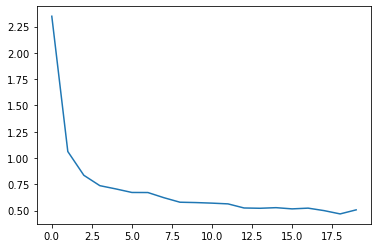

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])

In [19]:
preprocess = create_preprocess("multiinput_singleoutput")
model = create_model("multiinput_singleoutput")
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [21]:
batch_size = 32
len_train = sum([1 for _ in open('../data/train.csv')])

history = model.fit(train_set, steps_per_epoch=len_train // batch_size, epochs=20, validation_data=valid_set)
total_loss = model.evaluate(test_set)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
345/362 [===========================>..] - ETA: 0s - loss: 3.3898WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x169c66f70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach t

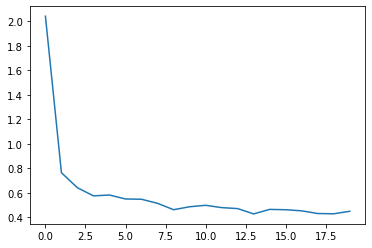

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])